# Pymaceuticals Inc.
---

### Analysis

- Summary Statistics for Tumor Volume:
Mean and Median Tumor Volume:

Capomulin and Ramicane exhibit lower mean and median tumor volumes compared to other drugs, indicating potential efficacy in reducing tumor sizes.

Tumor Volume Variance and Standard Deviation:
Lower variance and standard deviation suggest more consistent and potentially effective results with Capomulin and Ramicane in controlling tumor growth.

Standard Error of the Mean:
Capomulin and Ramicane have smaller standard errors, implying more reliable measurements and potentially more accurate representations of their effects on tumor volumes.
 

In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data=pd.merge(study_results, mouse_metadata, on= "Mouse ID")

# Display the data table for preview
merged_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
mice_count = len(merged_data["Mouse ID"].value_counts())
mice_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_rows = merged_data[merged_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mouse_ids = duplicate_rows['Mouse ID'].unique()

print("Duplicate Mouse IDs:", duplicate_mouse_ids)

Duplicate Mouse IDs: ['g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data = merged_data[merged_data['Mouse ID'].isin(duplicate_mouse_ids)]
duplicate_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
#df = merged_data.loc[merged_data["Mouse ID"] != "g989"]
#len(df)

In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
Cleaned_data = merged_data[~merged_data['Mouse ID'].isin(duplicate_mouse_ids)]
cleaned_data = merged_data[merged_data['Mouse ID'].isin(duplicate_mouse_ids)==False]

#cleaned_data = merged_data.drop_duplicates(subset='Mouse ID', keep='first')

cleaned_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [8]:
# Checking the number of mice in the clean DataFrame.
Cleaned_mice_count = Cleaned_data["Mouse ID"].nunique()
Cleaned_mice_count

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

summary = cleaned_data.groupby("Drug Regimen")['Tumor Volume (mm3)']

# Calculating statistics for tumor volume
summary_stats = pd.DataFrame({
    'Mean Tumor Volume': summary.mean(),
    'Median Tumor Volume': summary.median(),
    'Tumor Volume Variance': summary.var(),
    'Tumor Volume Std. Dev.': summary.std(),
    'Tumor Volume Std. Err.': summary.sem()
})

summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
summary_stats_advanced = cleaned_data.groupby("Drug Regimen").agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})
summary_stats_advanced

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

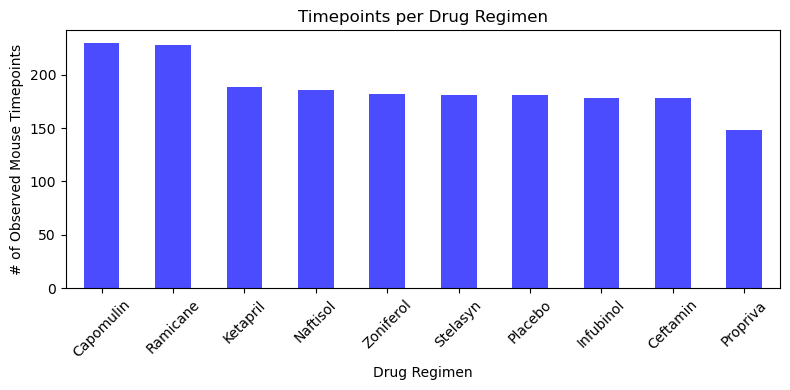

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

drug_counts = cleaned_data['Drug Regimen'].value_counts()
drug_counts.plot(kind='bar', figsize=(8, 4), color='blue', alpha=0.7)

plt.title('Timepoints per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

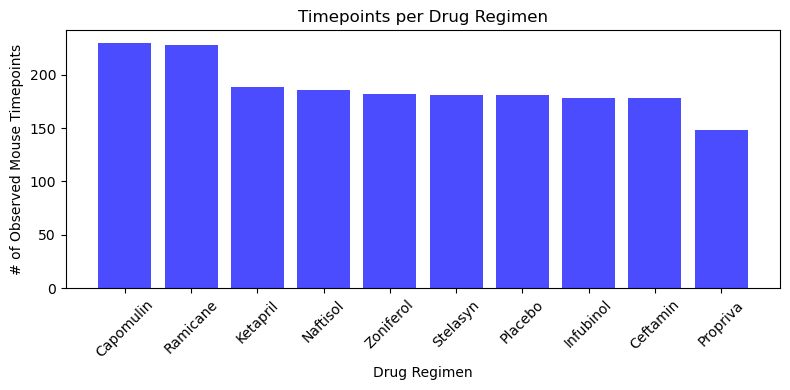

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_names = drug_counts.index.tolist()
counts = drug_counts.values.tolist()

plt.figure(figsize=(8,4))
plt.bar(drug_names, counts, color='blue', alpha=0.7)

plt.title('Timepoints per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

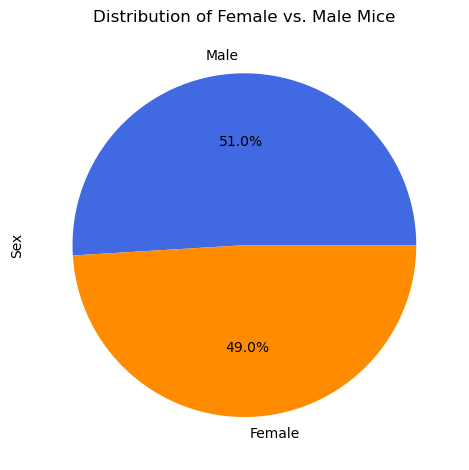

In [13]:
gender_distribution = cleaned_data['Sex'].value_counts()
gender_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['royalblue', 'darkorange'], startangle=0)               
plt.title('Distribution of Female vs. Male Mice')
plt.ylabel('Sex')
plt.tight_layout()

plt.show()

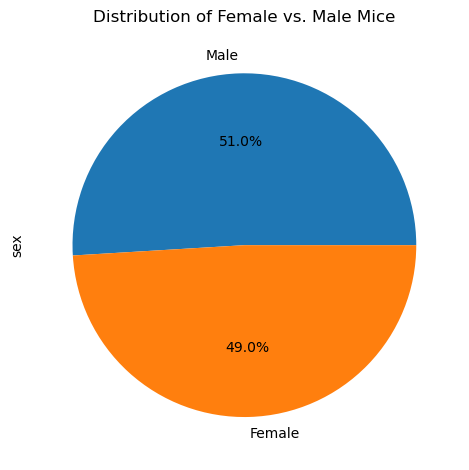

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
plt.pie(gender_distribution.values, labels = gender_distribution.index.values,autopct='%1.1f%%')
plt.title('Distribution of Female vs. Male Mice')
plt.ylabel('sex') 
plt.tight_layout()

plt.show()

## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

selected_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_data = merged_data[merged_data['Drug Regimen'].isin(selected_regimens)]

filtered_data = filtered_data.groupby('Mouse ID')['Timepoint'].max()
filtered_data = filtered_data.reset_index()
merged_data = filtered_data.merge(cleaned_data,on = ['Mouse ID','Timepoint'],how="left")
merged_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


In [19]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = merged_data['Drug Regimen'].unique()
tumor_vol_list = []

for treatment in treatments:
    treatment_data = merged_data.loc[merged_data['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    tumor_vol_list.append(treatment_data)
    
# Calculate the IQR and quantitatively determine if there are any potential outliers.
    quartiles = treatment_data.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
# Determine outliers using upper and lower bounds
    outliers = treatment_data.loc[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    
   
    if outliers.empty:
        print(f"{treatment}'s potential outliers: No outliers")
    else:
        print(f"{treatment}'s potential outliers:\n{outliers}")


Infubinol's potential outliers:
15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: No outliers
Ramicane's potential outliers: No outliers
Capomulin's potential outliers: No outliers


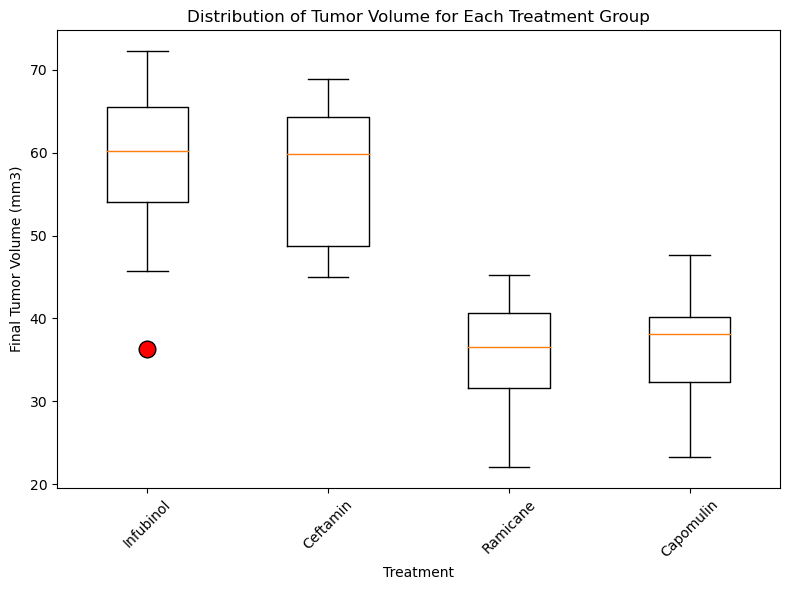

In [20]:
# Creating a boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(tumor_vol_list, labels=treatments, flierprops={'markerfacecolor':'red','markersize':12})

plt.title('Distribution of Tumor Volume for Each Treatment Group')
plt.xlabel('Treatment')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks(rotation=45)  

plt.tight_layout()
plt.show()


## Line and Scatter Plots

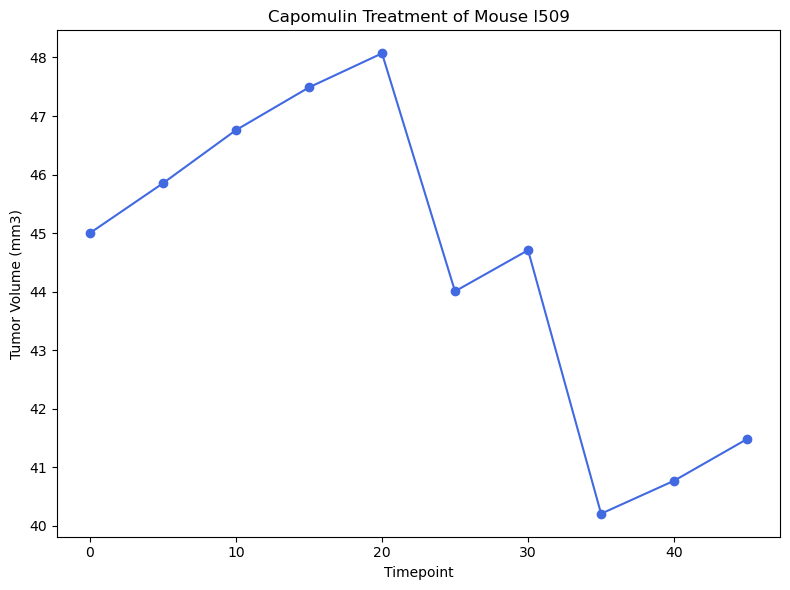

In [21]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Filter data for the specific mouse treated with Capomulin
mouse_data = cleaned_data.loc[(cleaned_data['Mouse ID'] == 'l509') & (cleaned_data['Drug Regimen'] == 'Capomulin')]

# Plotting tumor volume vs. time point for l509
plt.figure(figsize=(8, 6))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o', color='royalblue')

plt.title('Capomulin Treatment of Mouse l509')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.tight_layout()
plt.show()


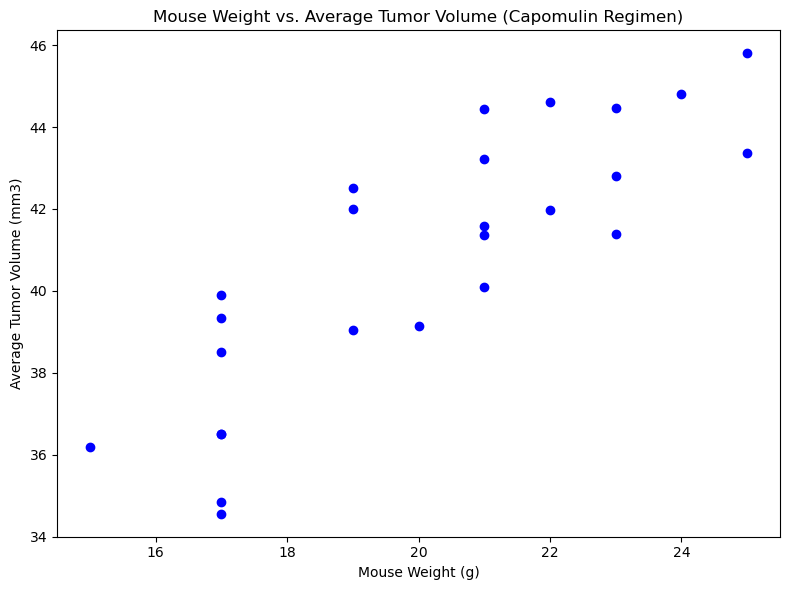

In [22]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


# Filter data for Capomulin regimen
capomulin_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']

# Group by Mouse ID to calculate average tumor volume and weight
avg_data = capomulin_data.groupby('Mouse ID').agg(
    Avg_Tumor_Volume=('Tumor Volume (mm3)', 'mean'),
    Avg_Weight=('Weight (g)', 'mean')
).reset_index()


plt.figure(figsize=(8, 6))
plt.scatter(avg_data['Avg_Weight'], avg_data['Avg_Tumor_Volume'], marker='o', color='blue')


plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.tight_layout()
plt.show()


## Correlation and Regression

Correlation Coefficient: 0.8419363424694722


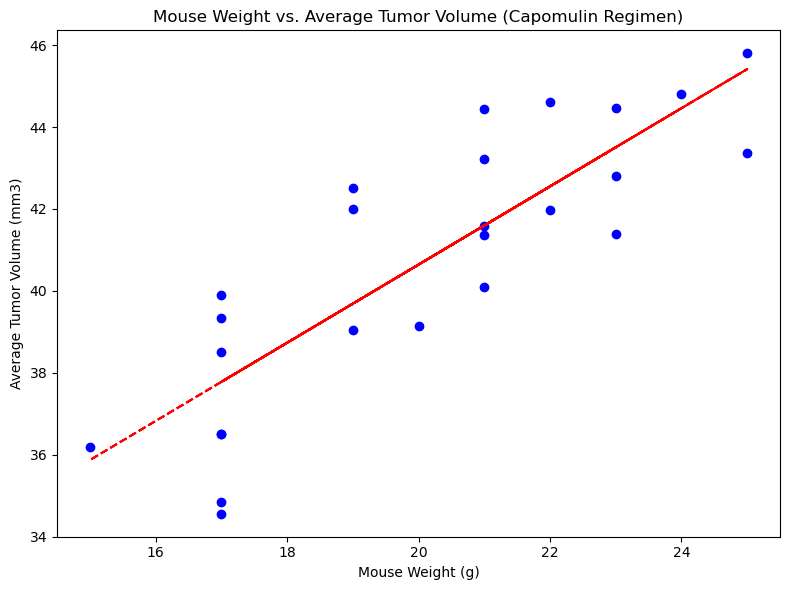

In [23]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

from scipy.stats import linregress



correlation_coefficient = avg_data['Avg_Weight'].corr(avg_data['Avg_Tumor_Volume'])
slope, intercept, r_value, p_value, std_err = linregress(avg_data['Avg_Weight'], avg_data['Avg_Tumor_Volume'])

# Create a scatter plot of mouse weight vs. average tumor volume
plt.figure(figsize=(8, 6))
plt.scatter(avg_data['Avg_Weight'], avg_data['Avg_Tumor_Volume'], marker='o', color='blue')


plt.plot(avg_data['Avg_Weight'], slope * avg_data['Avg_Weight'] + intercept, color='red', linestyle='--')


plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

print(f"Correlation Coefficient: {correlation_coefficient}")
plt.tight_layout()
plt.show()
